In [970]:
#Importe os pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score
from scipy.spatial import distance_matrix 

import matplotlib.cm as cm
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#Clusters
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN 




In [971]:
dados = pd.read_csv("/home/anderson/Área de Trabalho/Repositorio_GitHub/Mineracao Dados-Prescritivo/Projeto-Absenteeism/Absenteeism_at_work_AAA/Absenteeism_at_work.csv",sep=';', index_col="ID")

In [972]:
dados.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,,,,,,,,,,,,,,,,,,,,
11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [973]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 11 to 35
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reason for absence               740 non-null    int64  
 1   Month of absence                 740 non-null    int64  
 2   Day of the week                  740 non-null    int64  
 3   Seasons                          740 non-null    int64  
 4   Transportation expense           740 non-null    int64  
 5   Distance from Residence to Work  740 non-null    int64  
 6   Service time                     740 non-null    int64  
 7   Age                              740 non-null    int64  
 8   Work load Average/day            740 non-null    float64
 9   Hit target                       740 non-null    int64  
 10  Disciplinary failure             740 non-null    int64  
 11  Education                        740 non-null    int64  
 12  Son                   

In [974]:
dados.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [975]:
# Separar colunas categóricas
categorical_atts = ['Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

#Separar colunas numéricas
numerical_atts = dados.drop(columns=categorical_atts).columns.to_list()

In [976]:
# Número de valores únicos para os atributos categóricos
dados[categorical_atts].nunique()


Reason for absence      28
Month of absence        13
Day of the week          5
Seasons                  4
Disciplinary failure     2
Education                4
Social drinker           2
Social smoker            2
Pet                      6
Son                      5
dtype: int64

/home/anderson/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3695: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



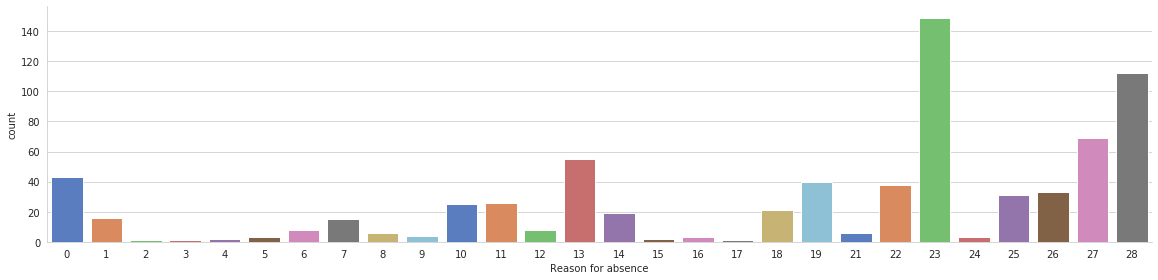

In [977]:
#Distribuição de plotagem da coluna "Motivo da ausência". Este atributo, diferente dos demais, compoe
#uma lista de subitems relacionados a falta médica, que cada CID compoe o motivo da ausência.
sns.set_style("whitegrid");
sns.catplot(data=dados, x='Reason for absence', kind= 'count',size=4, aspect=4, palette='muted');

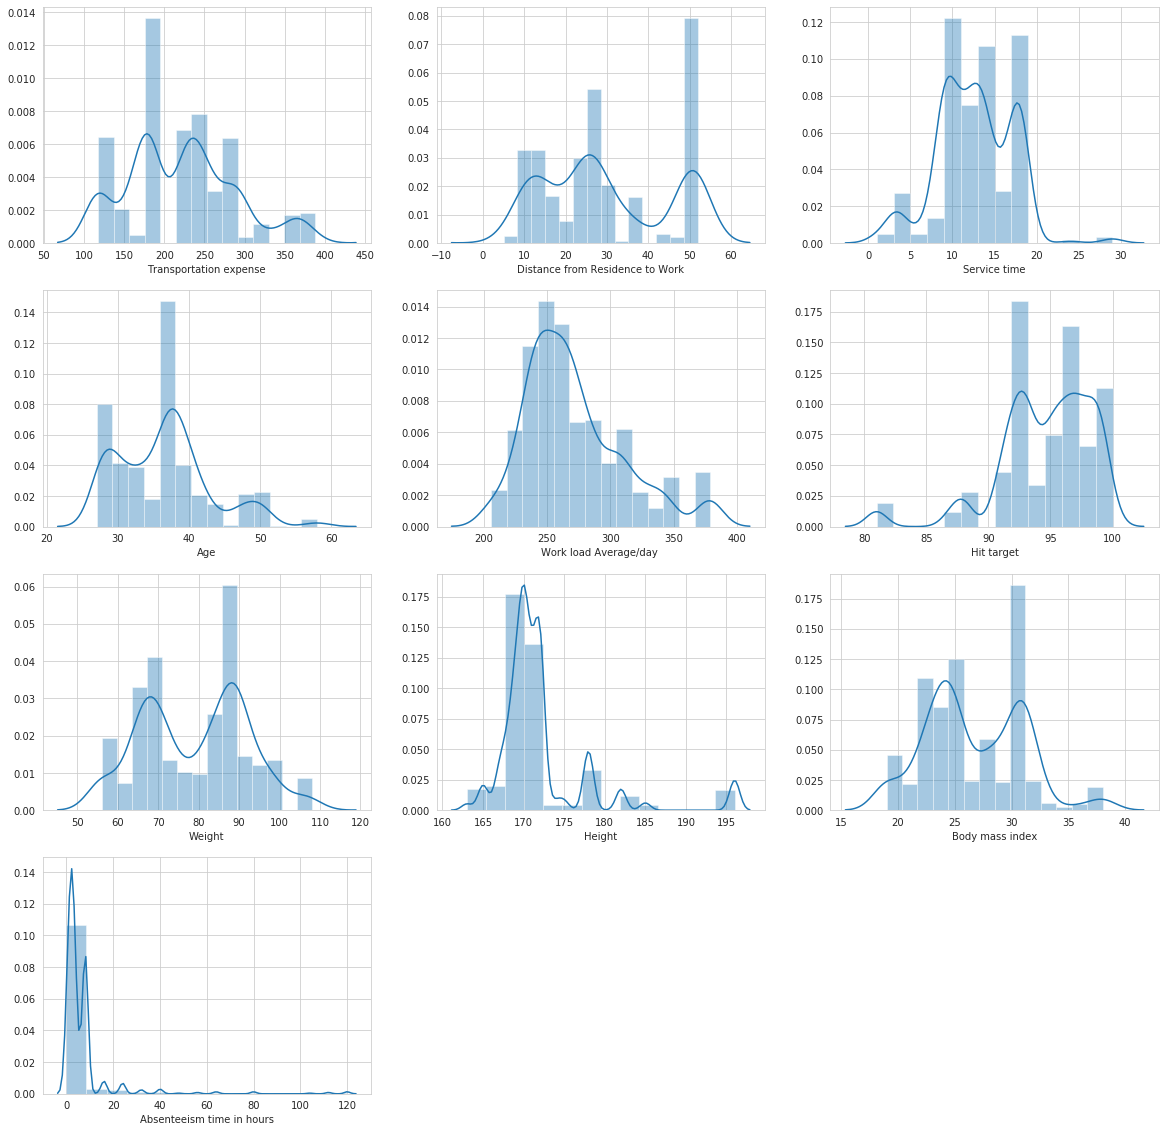

In [978]:
#Plotar a distribuição dos atributos numéricos
#Esse tipo de plotagem é interessante para conhecer melhor a característica dos atributos,
#com objetivo de identificar os picos e frequências dos dados de forma visual.
num_df = dados[numerical_atts]
plt.figure(figsize=(20,20))
for i in range(1, 11):
    plt.subplot(4, 3, i)
    sns.distplot(num_df[num_df.columns[i-1]],bins=14)

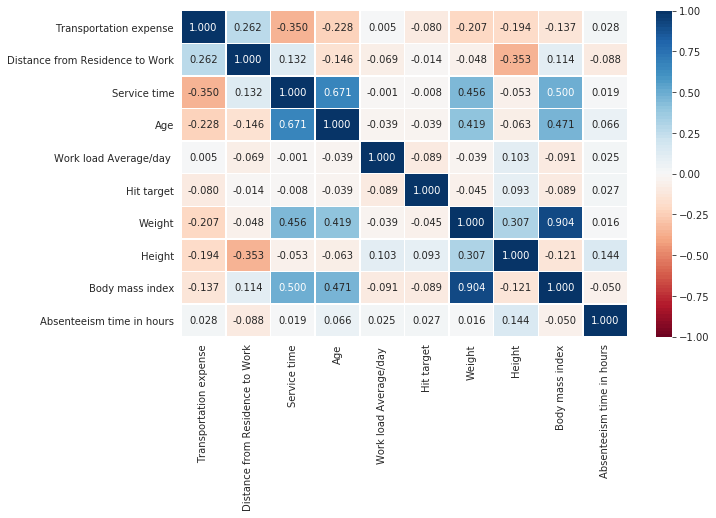

In [979]:
#Matriz de correção dos dados numéricos. Importante para enxergar a similaridade entre os atributos.
#Este tem como objetivo de facilitar na redução de dimensionalidade, pois no futuro, pode ocasionar impacto
#no processamento, caso aumente de forma exponencial os dados.

num_corr = num_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(num_corr, annot=True, fmt=".3f",vmin=-1, vmax=1, linewidths=.5, cmap = sns.color_palette("RdBu", 100))
plt.yticks(rotation=0)
plt.show()

#Diante análise pode perceber que há algumas colunas como "Weight" e "Body mass index", há uma alta similaridade
#podendo assim se tornar uma única coluna os representando.

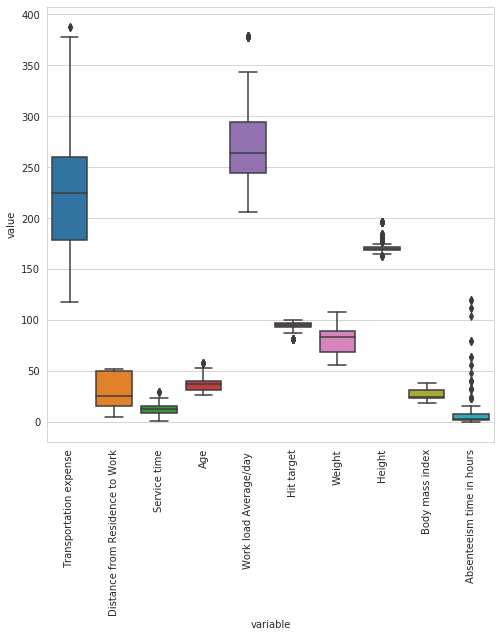

In [980]:
# exibir no boxlots, para visualização de outliers
plt.figure(figsize=(8,8))
sns.boxplot(x="variable", y="value", data=pd.melt(num_df))
plt.xticks(rotation=90)
plt.show()

In [981]:
# Identificar os outliers e depois removê-los, pois pode afetar no processamento de clusterização.
# Identificando pseudos padrões. Pois o sistema vai ser treinado com instâncias normais, e caso entre algum outro valor
# incomum vai ser fácil identificar o valor fora dos grupos de clusters.
for num_att in numerical_atts:
    # pegando o percentil entre 75% e 25% da variável dos valores das colunas
    Q3, Q1 = np.percentile(dados[num_att], [75,25])
    MEAN = dados[num_att].mean()
    
    # Calculando a amplitude interquartil
    IQR = Q3 - Q1
    
    # Cálculo da extream superior e da extream inferior
    minimum = Q1 - (IQR*1.5)
    maximum = Q3 + (IQR*1.5)
    
    # Substituindo todos os valores autlier's para média.
    data_clean=dados.drop(dados.loc[dados[num_att]< minimum,num_att].index) 
    data_clean=dados.drop(dados.loc[dados[num_att]> maximum,num_att].index)

In [982]:
# redução de 150 valores da amostra de: 740.

len(data_clean)

150

In [983]:
#Normalização dos dados para identificar colunas importantes

numeric_transformer = MinMaxScaler()

# Excluir a variável principal(target), que determina o resultado. Pois a idéia é utilizar
# aprendizagem não supervisionada.
numerical_atts = [x for x in numerical_atts if x not in ['Absenteeism time in hours']]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_atts),
        ('cat', 'passthrough', categorical_atts)
    ], remainder='passthrough')
data_pp = preprocessor.fit_transform(data_clean)


In [984]:
#Selecionando as colunas

# Detectar variáveis importantes)
y_original = data_pp[:,-1].reshape(-1, 1)
y = np.round(MinMaxScaler((0,2)).fit_transform(y_original)).ravel()
X = np.delete(data_pp,-1,1) 

# validação cruzada com 10 divisões
cross_val = ShuffleSplit(n_splits=10, random_state = 42)

# definir modelo
rf = RandomForestClassifier(random_state = 0,max_features=None,n_jobs=-1)

# parameters 
parameters = {  
                "n_estimators":[1000],
                #'max_depth': list(range(1,11)),
                #"criterion": ["gini","entropy"],
                #"criterion": ["mse","mae"],
                #"class_weight": [None, "balanced"],
                #"max_features":["auto", None, "log2"],
                }

# Pesquisar no grid por parâmetros
grid = GridSearchCV(estimator=rf, param_grid=parameters, cv=cross_val, n_jobs=-1)#multithreading; todos os núcleos são usados
grid.fit(X,y)

# Imprimir as melhores pontuações
print("Os melhores parâmetros são %s Com uma pontuação de %0.4f"
      % (grid.best_params_, grid.best_score_))

Os melhores parâmetros são {'n_estimators': 1000} Com uma pontuação de 0.7133


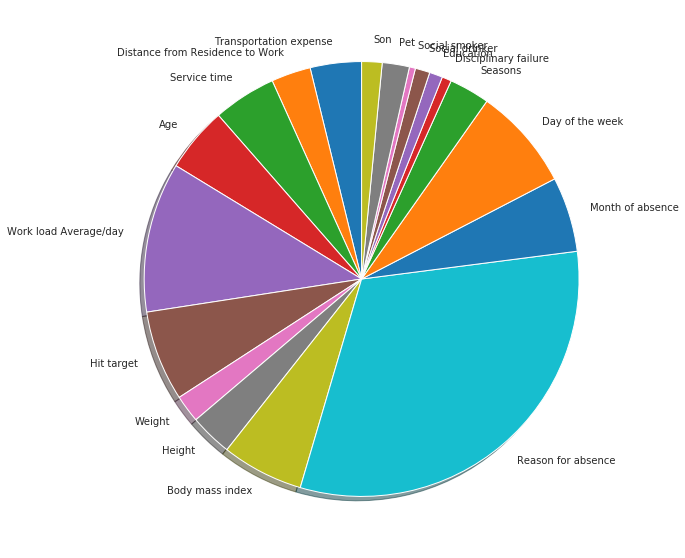

In [985]:
# Gráfico de pizza
atts = numerical_atts+categorical_atts
plt.figure(figsize=(10,10))
plt.pie(grid.best_estimator_.feature_importances_, labels=atts, shadow=True, startangle=90);

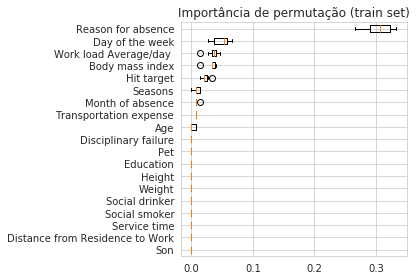

Reason for absence 0.305 +/- 0.021
Day of the week 0.049 +/- 0.013
Work load Average/day  0.035 +/- 0.009
Body mass index 0.033 +/- 0.007
Hit target 0.021 +/- 0.006
Seasons  0.009 +/- 0.004
Month of absence 0.007 +/- 0.002
Transportation expense 0.007 +/- 0.000
Age      0.003 +/- 0.003
Disciplinary failure 0.000 +/- 0.000
Pet      0.000 +/- 0.000
Education 0.000 +/- 0.000
Height   0.000 +/- 0.000
Weight   0.000 +/- 0.000
Social drinker 0.000 +/- 0.000
Social smoker 0.000 +/- 0.000
Service time 0.000 +/- 0.000
Distance from Residence to Work 0.000 +/- 0.000
Son      0.000 +/- 0.000


In [986]:
#importância da permutação com classificador de RF
atts_arr = np.array(atts)
result = permutation_importance(grid, X, y, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=atts_arr[sorted_idx])
ax.set_title("Importância de permutação (train set)")
fig.tight_layout()
plt.show()

for i in result.importances_mean.argsort()[::-1]:
     print(f"{atts_arr[i]:<8} "
           f"{result.importances_mean[i]:.3f}"
           f" +/- {result.importances_std[i]:.3f}")

In [987]:
# Selecionando os atributos mais relevantes.
selected_atts = ['Reason for absence', 'Day of the week', 'Work load Average/day ','Body mass index','Hit target', 
                     'Seasons', 'Month of absence', 'Transportation expense', 'Age']

selected_atts_idx=np.where(np.isin(atts,selected_atts))[0]
X_selected = X[:,selected_atts_idx]


# Definindo dataset para trabalhar no meu modelo, considerando as variáveis mais relevantes.
# class = Tempo de ausência em horas.

#Objetivo é encontrar clusteres referente aos grupos de horas faltantes pelos funcionários.

In [988]:
#Capturando as features
dados_new = pd.DataFrame(X_selected)

dados_new.rename(columns={0:'motivo_ausencia'
                          , 1:'dia_da_semana'
                          , 2:'carga_trabalho_media_dia'
                          , 3:'indice_massa_corporea'
                          , 4:'atingindo_alvo'
                          , 5:'estacoes_ano'
                          , 6:'mes_ausencia'
                          , 7:'despesas_transporte'
                          , 8:'ano'}, inplace=True);
dados_new.head()



,motivo_ausencia,dia_da_semana,carga_trabalho_media_dia,indice_massa_corporea,atingindo_alvo,estacoes_ano,mes_ausencia,despesas_transporte,ano
0,0.596296,0.461538,0.194471,0.842105,0.176471,7.0,7.0,5.0,1.0
1,0.433333,0.384615,0.194471,0.842105,0.470588,22.0,7.0,2.0,1.0
2,0.262963,0.230769,0.194471,0.842105,0.235294,11.0,7.0,5.0,1.0
3,0.481481,0.769231,0.000000,0.578947,0.647059,23.0,8.0,4.0,1.0
4,0.144444,0.076923,0.000000,0.578947,0.058824,28.0,8.0,4.0,1.0


In [989]:
#Normalização dos dados do novo dataset.
scaler = MinMaxScaler()
scaler.fit(X_selected)
dados_normalizados = scaler.transform(X_selected)

dados_normalizados_df = pd.DataFrame(dados_normalizados)
dados_normalizados_df.columns = dados_new.columns
dados_normalizados_df.describe()

dados_normalizados_df

,motivo_ausencia,dia_da_semana,carga_trabalho_media_dia,indice_massa_corporea,atingindo_alvo,estacoes_ano,mes_ausencia,despesas_transporte,ano
0,0.596296,0.461538,0.194471,0.842105,0.176471,0.250000,0.583333,0.75,0.000000
1,0.433333,0.384615,0.194471,0.842105,0.470588,0.785714,0.583333,0.00,0.000000
2,0.262963,0.230769,0.194471,0.842105,0.235294,0.392857,0.583333,0.75,0.000000
3,0.481481,0.769231,0.000000,0.578947,0.647059,0.821429,0.666667,0.50,0.000000
4,0.144444,0.076923,0.000000,0.578947,0.058824,1.000000,0.666667,0.50,0.000000
...,...,...,...,...,...,...,...,...,...
145,0.262963,0.230769,0.339296,0.631579,0.235294,0.785714,0.583333,0.25,0.000000
146,0.433333,0.384615,0.339296,0.631579,0.470588,0.392857,0.583333,0.25,0.000000
147,0.000000,0.500000,0.377540,0.736842,0.764706,0.000000,0.000000,0.25,0.000000
148,0.418519,0.461538,0.377540,0.736842,0.823529,0.000000,0.000000,0.50,0.333333


In [990]:
################################################################################################################
################################### APLICANDO ALGORITMOS DE CLUSTERS ###########################################
################################################################################################################

In [991]:
#================================================== KMEANS =====================================================

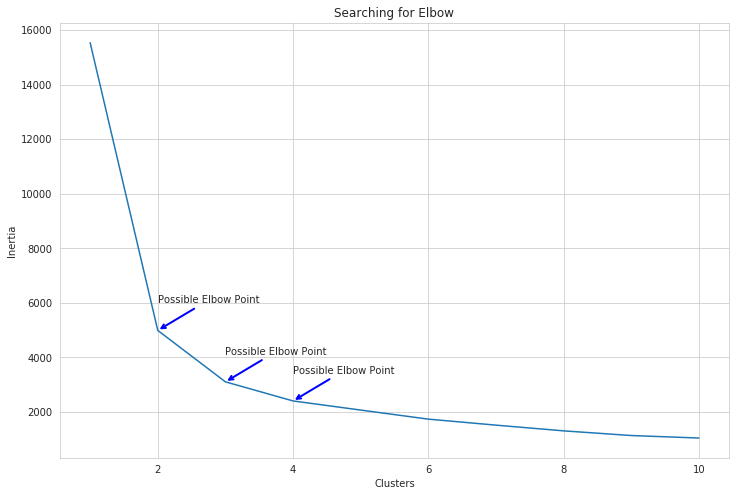

In [992]:
#Executando o K-means com um range de 10 clusters para análise com método elbow
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X_selected)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(4, clusters[3]), xytext=(4, clusters[3]+1000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(3,clusters[2] ), xytext=(3, clusters[2]+1000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(2,clusters[1] ), xytext=(2, clusters[1]+1000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

In [993]:
# 2 clusters
km2 = KMeans(n_clusters=2).fit(X)

X_embedded  = TSNE(n_components=3, perplexity=10, random_state=24).fit_transform( X )
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])

fig = px.scatter_3d(x=X_embedded [:,0],y=X_embedded [:,1],z=X_embedded [:,2],color=colors[km2.labels_])
fig.show()

In [994]:
# 3 clusters
km2 = KMeans(n_clusters=3).fit(X)

# Plotando usando o TSNE
X_embedded  = TSNE(n_components=3, perplexity=10, random_state=24).fit_transform( X )
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])

fig = px.scatter_3d(x=X_embedded [:,0],y=X_embedded [:,1],z=X_embedded [:,2],color=colors[km2.labels_])
fig.show()

In [995]:
# 4 clusters
km2 = KMeans(n_clusters=4).fit(X)

# plot using tsne 
X_embedded  = TSNE(n_components=3, perplexity=10, random_state=24).fit_transform( X )
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])

fig = px.scatter_3d(x=X_embedded [:,0],y=X_embedded [:,1],z=X_embedded [:,2],color=colors[km2.labels_])
fig.show()

In [996]:
#K-means com PCA
pca = PCA(n_components=3)
pca_results = pca.fit_transform(X_selected)

#treinando, e plotando.
km_pca = KMeans(n_clusters=3).fit(pca_results)
fig = px.scatter_3d(x=pca_results [:,0],y=pca_results [:,1],z=pca_results [:,2],color=colors[km_pca.labels_])
fig.show()

In [997]:
# É mais interessante o uso do t-sne oferece melhor resultado. 

In [998]:
#========================================= AgglomerativeClustering =============================================

In [999]:

# 6 clusters
agnes6 = AgglomerativeClustering(n_clusters=6, linkage='average').fit(X_selected)

# plotagem usando t-sne 
X_embedded  = TSNE(n_components=3, perplexity=10,random_state=24).fit_transform( X_selected )

fig = px.scatter_3d(x=X_embedded [:,0],y=X_embedded [:,1],z=X_embedded [:,2],color=colors[agnes6.labels_])
fig.show()

In [1000]:
#================================================= DBSCAN =====================================================

In [1001]:
# Detectar os melhores parâmetros usando: silhouette_score
score_list=[]
for eps in np.arange(0.5,20,0.5):
    for min_samples in range(3,20):
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_selected)
        labels = db.labels_
        n = len(np.unique(labels))
        if n>1:
            score=silhouette_score(X_selected, labels)
            score_list.append((score,(eps,min_samples)))
     
biggest_score = sorted(score_list)[-1]  
best_eps, best_min_spamles = biggest_score[1]
best_eps, best_min_spamles

(5.0, 11)

In [1002]:
db_best = DBSCAN(eps=best_eps, min_samples=best_min_spamles).fit(X_selected)

# plotar usando t-sne 
X_embedded  = TSNE(n_components=3, perplexity=10,random_state=24).fit_transform( X_selected )

fig = px.scatter_3d(x=X_embedded [:,0],y=X_embedded [:,1],z=X_embedded [:,2],color=colors[db_best.labels_])
fig.show()

In [1003]:
#============================================== Kmedoids =====================================================

In [1004]:
# Kmedoids
kmedoids = KMedoids(metric="manhattan", n_clusters=4).fit(X_selected)

# plotar usando t-sne 
X_embedded  = TSNE(n_components=3, perplexity=10,random_state=24).fit_transform( X_selected )

fig = px.scatter_3d(x=X_embedded [:,0],y=X_embedded [:,1],z=X_embedded [:,2],color=colors[kmedoids.labels_])
fig.show()


In [1005]:
#################################################################################################################
###################################### CONCLUSÃO/ANÁLISE DE MÉTRICAS ############################################
#################################################################################################################

In [1006]:
'''
Diante dos 4 algoritmos de clusterização utilizados. Estaremos analisando algumas métricas, com relação:

  1) Na métrica de homogeneidade e completude
  2) Ran Index:
  3) Métrica de Davies-Bouldin
'''


'\nDiante dos 4 algoritmos de clusterização utilizados. Estaremos analisando algumas métricas, com relação:\n\n  1) Na métrica de homogeneidade e completude\n  2) Ran Index:\n  3) Métrica de Davies-Bouldin\n'

In [1009]:
from sklearn.metrics import davies_bouldin_score as db
# Exibir valores das métricas de cada modelo.
models = [km2, km_pca, agnes6, db_best, kmedoids] 
names = ["K-MEANS:","PCA + K-MEANS:","AGGLOMERATIVE-CLUSTERING:", "DBSCAN:", "KMEDOIDS"]

for i, model in enumerate(models):
    labels = model.labels_
    n = len(np.unique(labels))
    y = np.round(MinMaxScaler((0,n)).fit_transform(y_original)).ravel()
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print(names[i])
    print('Estimando o número de clusters: %d' % n_clusters_)

    #Quanto maior melhor----------------------------------------
    print("Homogeneidade: %0.3f" % homogeneity_score(y, labels))
    print("Completude: %0.3f" % completeness_score(y, labels))
    print("V-measure: %0.3f" % v_measure_score(y, labels))
    #-----------------------------------------------------------
    
    #----------RAND INDEX---------------------------------------
    print("Índice de margem ajustada: %0.3f"
          % adjusted_rand_score(y, labels))
    #-----------------------------------------------------------
    
    
    print("Métrica de Davies-Bouldin: %0.3f"
          % db(X_selected, labels))
  
    print("\n")
    

K-MEANS:
Estimando o número de clusters: 4
Homogeneidade: 0.157
Completude: 0.133
V-measure: 0.144
Índice de margem ajustada: 0.075
Métrica de Davies-Bouldin: 0.982


PCA + K-MEANS:
Estimando o número de clusters: 3
Homogeneidade: 0.147
Completude: 0.176
V-measure: 0.160
Índice de margem ajustada: 0.077
Métrica de Davies-Bouldin: 0.742


AGGLOMERATIVE-CLUSTERING:
Estimando o número de clusters: 6
Homogeneidade: 0.211
Completude: 0.188
V-measure: 0.199
Índice de margem ajustada: 0.110
Métrica de Davies-Bouldin: 0.903


DBSCAN:
Estimando o número de clusters: 2
Homogeneidade: 0.029
Completude: 0.045
V-measure: 0.035
Índice de margem ajustada: -0.035
Métrica de Davies-Bouldin: 0.535


KMEDOIDS
Estimando o número de clusters: 4
Homogeneidade: 0.150
Completude: 0.128
V-measure: 0.138
Índice de margem ajustada: 0.068
Métrica de Davies-Bouldin: 0.975




In [1010]:
#Análise: Homogeneidade, Completude e a média(V-measure)
'''
 O termo homogêneo é diferente de completude, no sentido de que, ao falar sobre homogeneidade,
 o conceito base é do respectivo cluster, que verificamos se em cada cluster cada ponto de dados
 tem o mesmo rótulo de classe. Ao falar sobre integridade, o conceito base é do respectivo rótulo de classe,
 que verificamos se os pontos de dados de cada rótulo de classe estão no mesmo cluster.
 
 Diante disso quanto maior a pontuação dos dois casos, melhor é a métrica.
 
 Concluisse que, o (AGGLOMERATIVE-CLUSTERING) obteve a melhor pontuação seguido por (K-MEANS|PCA),
 K-MEANS, KMEDOIDS e por último DBSCAN.
 
 OBS: Isso denuncia o Cluster DBSCAN ficando óbvio sua pior pontuação nesse quesito,
 já que não possui muita consistência no quesito completude, justamente porque só há "dois nós".
'''
    

'\n O termo homogêneo é diferente de completude, no sentido de que, ao falar sobre homogeneidade,\n o conceito base é do respectivo cluster, que verificamos se em cada cluster cada ponto de dados\n tem o mesmo rótulo de classe. Ao falar sobre integridade, o conceito base é do respectivo rótulo de classe,\n que verificamos se os pontos de dados de cada rótulo de classe estão no mesmo cluster.\n \n Diante disso quanto maior a pontuação dos dois casos, melhor é a métrica.\n \n Concluisse que, o (AGGLOMERATIVE-CLUSTERING) obteve a melhor pontuação seguido por (K-MEANS|PCA),\n K-MEANS, KMEDOIDS e por último DBSCAN.\n \n OBS: Isso denuncia o Cluster DBSCAN ficando óbvio sua pior pontuação nesse quesito,\n já que não possui muita consistência no quesito completude, justamente porque só há "dois nós".\n'

In [1011]:
#Análise: Índice de margem ajustada (Adjusted Rand Index)
'''
O índice Rand é uma função que calcula uma medida de similaridade entre dois agrupamentos.

O índice de Rand sugere que o k- meio de agrupamento dos dados da Absenteeism usando medições de 
motivo_ausencia, dia_da_semana, carga_trabalho_media_dia, indice_massa_corporea, atingindo_alvo,
estacoes_ano, mes_ausencia, despesas_transporte e ano é semelhante ao real "agrupamento" dos dados.

A rotulagem perfeita seria pontuada como 1 e a rotulagem ruim ou rotulagem independente será 
pontuada com 0 ou negativo.

Concluisse que, o (AGGLOMERATIVE-CLUSTERING) obteve a melhor pontuação no quesito, seguido por K-MEANS|PCA
, KMEANS, KMEDOIDS e por último DBSCAN.
'''
    

'\nO índice Rand é uma função que calcula uma medida de similaridade entre dois agrupamentos.\n\nO índice de Rand sugere que o k- meio de agrupamento dos dados da Absenteeism usando medições de \nmotivo_ausencia, dia_da_semana, carga_trabalho_media_dia, indice_massa_corporea, atingindo_alvo,\nestacoes_ano, mes_ausencia, despesas_transporte e ano é semelhante ao real "agrupamento" dos dados.\n\nA rotulagem perfeita seria pontuada como 1 e a rotulagem ruim ou rotulagem independente será \npontuada com 0 ou negativo.\n\nConcluisse que, o (AGGLOMERATIVE-CLUSTERING) obteve a melhor pontuação no quesito, seguido por K-MEANS|PCA\n, KMEANS, KMEDOIDS e por último DBSCAN.\n'

In [1012]:
#Análise: Métrica de Davies-Bouldin (Davies–Bouldin index)

'''
Com relação a métrica de Davies-Bouldin: (Agrupamentos mais afastados e menos dispersos) resultarão em uma pontuação
melhor. A pontuação mínima é 0, com valores mais baixos, indica melhor agrupamento.

Concluisse que, o (DBSCAN) obteve a melhor pontuação no quesito,
seguido por K-MEANS|PCA, K-MEANS, AGGLOMERATIVE-CLUSTERING, KMEDOIDS e por último K-MEANS
'''

'\nCom relação a métrica de Davies-Bouldin: (Agrupamentos mais afastados e menos dispersos) resultarão em uma pontuação\nmelhor. A pontuação mínima é 0, com valores mais baixos, indica melhor agrupamento.\n\nConcluisse que, o (DBSCAN) obteve a melhor pontuação no quesito,\nseguido por K-MEANS|PCA, K-MEANS, AGGLOMERATIVE-CLUSTERING, KMEDOIDS e por último K-MEANS\n'

In [1013]:
############################################# CONCLUSÃO #####################################################

In [1014]:
'''
Com base nas 3 Métricas aferidas, o algoritmo de clusterização que se saíu melhor no agrupamento
deste dataset foi o (AGGLOMERATIVE-CLUSTERING), se saindo vitoriozo em 2 das 3 avalizações.
'''

'\nCom base nas 3 Métricas aferidas, o algoritmo de clusterização que se saíu melhor no agrupamento\ndeste dataset foi o (AGGLOMERATIVE-CLUSTERING), se saindo vitoriozo em 2 das 3 avalizações.\n'

In [1015]:
#############################################################################################################
############################################ REFERÊNCIAS ####################################################
#############################################################################################################

In [ ]:
https://www.tutorialspoint.com/scikit_learn/scikit_learn_clustering_performance_evaluation.htm

https://www.geeksforgeeks.org/ml-v-measure-for-evaluating-clustering-performance/
    
https://davetang.org/muse/2017/09/21/the-rand-index/
    
https://www.tutorialspoint.com/scikit_learn/scikit_learn_clustering_performance_evaluation.htm
    
https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
    
https://plotly.com/python/
    
https://www.kaggle.com/hakkoz/absenteeism-at-work-clustering
    
https://minerandodados.com.br/algoritmo-k-means-python-passo-passo/
    
https://medium.com/@plog397/functions-to-plot-kmeans-hierarchical-and-dbscan-clustering-c4146ed69744
    
https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work 